# IBM MACHINE LEARNING - PROJECT D

## Date Fruit Segmentation & Dimensionality Reduction via PCA

### 1 - General Information About the Dataset 

**The dataset has been collected from "Koklu, M. et al. (2021). "Classification of Date Fruits into Genetic Varieties Using Image Analysis" journal paper. It represents the physical attributes of the date fruits. These features can be used to classify the type of date, i.e., Dokol, Safavi, Rotana, Deglet, Sogay, Iraqi, or Berhi.**

### 2 - Analysis Objectives

**A - To find out which segmentation is most appropriate to the dataset.**

**B - To reduce number of features using PCA.**

In [1]:
# Importing the necessary libraries
import pandas as pd # For data frame manipulation 
import numpy as np # For linear Algebra
import seaborn as sns # For plotting 
import matplotlib.pyplot as plt # For plotting

import os # To access directory
os.chdir('/users/salahkaf/desktop/Data')

# Machine Learning libraries
from sklearn.model_selection import train_test_split # To split data
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # To evaluate models
from sklearn.metrics import classification_report # To evaluate models
from sklearn.metrics import confusion_matrix # To plot models outcome


%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_excel('/Users/salahkaf/Desktop/Date_Fruit_Datasets.xlsx', sheet_name = 'Date_Fruit_Datasets')

In [3]:
data.head().T # first 5 rows

,0,1,2,3,4
AREA,422163,338136,526843,416063,347562
PERIMETER,2378.908,2085.144,2647.394,2351.21,2160.354
MAJOR_AXIS,837.8484,723.8198,940.7379,827.9804,763.9877
MINOR_AXIS,645.6693,595.2073,715.3638,645.2988,582.8359
ECCENTRICITY,0.6373,0.569,0.6494,0.6266,0.6465
EQDIASQ,733.1539,656.1464,819.0222,727.8378,665.2291
SOLIDITY,0.9947,0.9974,0.9962,0.9948,0.9908
CONVEX_AREA,424428,339014,528876,418255,350797
EXTENT,0.7831,0.7795,0.7657,0.7759,0.7569
ASPECT_RATIO,1.2976,1.2161,1.315,1.2831,1.3108


In [4]:
print('data frame shape is', data.shape)

data frame shape is (898, 13)


In [5]:
pd.set_option("display.float", "{:.2f}".format) # Shows up to two decimal points
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.00,298295.21,107245.21,1987.00,206948.00,319833.00,382573.00,546063.00
PERIMETER,898.00,2057.66,410.01,911.83,1726.09,2196.35,2389.72,2812.00
MAJOR_AXIS,898.00,750.81,144.06,336.72,641.07,791.36,858.63,1222.72
MINOR_AXIS,898.00,495.87,114.27,2.28,404.68,495.05,589.03,766.45
ECCENTRICITY,898.00,0.74,0.09,0.34,0.69,0.75,0.80,1.00
EQDIASQ,898.00,604.58,119.59,50.30,513.32,638.14,697.93,833.83
SOLIDITY,898.00,0.98,0.02,0.84,0.98,0.99,0.99,1.00
CONVEX_AREA,898.00,303845.59,108815.66,2257.00,210022.75,327207.00,388804.00,552598.00
EXTENT,898.00,0.74,0.05,0.51,0.71,0.75,0.78,0.86
ASPECT_RATIO,898.00,2.13,17.82,1.07,1.37,1.52,1.67,535.53


In [6]:
# We observe an outliers [unrealistic value] in ASPECT_RATIO and COMPACTNESS columns
print('Aspect ratio outlier value is :',data.ASPECT_RATIO.max()) # The outlier 1
print('Compactness outlier value is :', data.COMPACTNESS.min()) # The outlier 2

Aspect ratio outlier value is : 535.5257
Compactness outlier value is : 0.0411


In [7]:
display(data[data.ASPECT_RATIO == data.ASPECT_RATIO.max()]) # Finding the outlier row 
print('The outlier class is', data[data.ASPECT_RATIO == data.ASPECT_RATIO.max()].Class)
# It is the same index for compactness as well

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
615,1987,2289.31,1222.72,2.28,1.00,50.30,0.88,2257,0.85,535.53,0.00,0.04,SAFAVI


The outlier class is 615    SAFAVI
Name: Class, dtype: object


In [8]:
 # Extracting the index of the outlier
outlier_index = data[data.ASPECT_RATIO == data.ASPECT_RATIO.max()].index.to_list()
outlier_index

[615]

In [9]:
# data_without_outlier = data.drop(615, axis = 0)
# SAFAVI_AR_mean = data_without_outlier[data_without_outlier.Class=='SAFAVI'].ASPECT_RATIO.mean()  
# SAFAVI_COM_mean = data_without_outlier[data_without_outlier.Class=='SAFAVI'].COMPACTNESS.mean() 
# data.at[615,'ASPECT_RATIO'] = SAFAVI_mean # Replacing the outlier with the mean of SAFAVI mean
# data.at[615,'COMPACTNESS'] = SAFAVI_COM_mean # Replacing the outlier with the mean of SAFAVI mean

We could have imputed row 615 with average values as above, but I observed that it is also an outlier in other measurements as well, so let us remove it entirely! 

In [10]:
data.drop(615,axis =0, inplace = True)

In [11]:
# missing values:
data.isna().sum() 

AREA            0
PERIMETER       0
MAJOR_AXIS      0
MINOR_AXIS      0
ECCENTRICITY    0
EQDIASQ         0
SOLIDITY        0
CONVEX_AREA     0
EXTENT          0
ASPECT_RATIO    0
ROUNDNESS       0
COMPACTNESS     0
Class           0
dtype: int64

In [12]:
# Data type
data.dtypes

AREA              int64
PERIMETER       float64
MAJOR_AXIS      float64
MINOR_AXIS      float64
ECCENTRICITY    float64
EQDIASQ         float64
SOLIDITY        float64
CONVEX_AREA       int64
EXTENT          float64
ASPECT_RATIO    float64
ROUNDNESS       float64
COMPACTNESS     float64
Class            object
dtype: object

In [13]:
## Make a backup copy of the data for later use
data_orig = data.copy()

### 3 - Target Feature Distribuiton

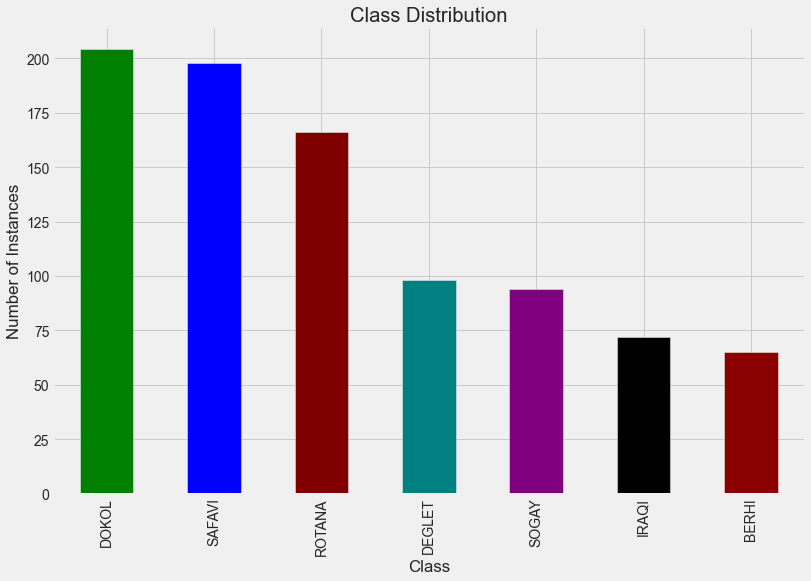

In [14]:
data.Class.value_counts().plot(kind = 'bar',figsize=(12,8), color = ['g','b','maroon','teal','purple','black','darkred'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances');

In [15]:
# Showing the percentage of each class
ratios = data.Class.value_counts(normalize = True).to_frame()
ratios.Class = ratios.Class*100
ratios.rename(columns = {"Class": "Class%"}, inplace=True)
ratios

,Class%
DOKOL,22.74
SAFAVI,22.07
ROTANA,18.51
DEGLET,10.93
SOGAY,10.48
IRAQI,8.03
BERHI,7.25


In [16]:
values = data.Class.value_counts().to_frame()
values

,Class
DOKOL,204
SAFAVI,198
ROTANA,166
DEGLET,98
SOGAY,94
IRAQI,72
BERHI,65


In [17]:
Stats = pd.concat([ratios,values],axis = 1)
Stats

,Class%,Class
DOKOL,22.74,204
SAFAVI,22.07,198
ROTANA,18.51,166
DEGLET,10.93,98
SOGAY,10.48,94
IRAQI,8.03,72
BERHI,7.25,65


### 4 - Features Correlation

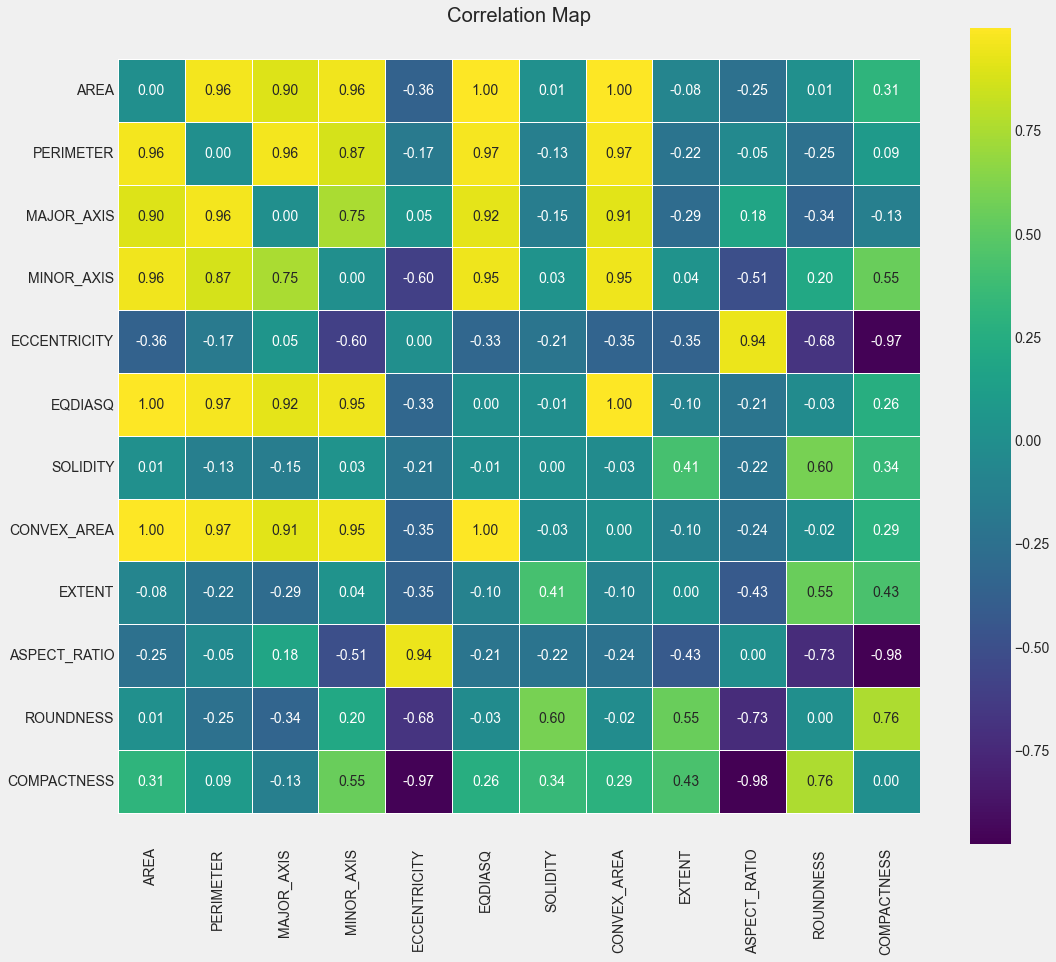

In [18]:
corr_mat = data.corr() # create corrlation matrix
for x in range(len(corr_mat)): # Make the diagonal = 0
    corr_mat.iloc[x,x] = 0.0

    
# Create the plotting figure   
fig, ax = plt.subplots(figsize=(16, 14))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="viridis");
ax.set_title('Correlation Map')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [19]:
# Calculate the correlation values between features
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values) # The lower triangle

# Make the unused values NaNs
corr_array = np.array(corr_values) # Changing the df to an array
corr_array[tril_index] = np.nan # Assigning the lower traingle to nan
    
# Recreate Pandas correlation data frame
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns, index= corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   feature1         66 non-null     object 
 1   feature2         66 non-null     object 
 2   correlation      66 non-null     float64
 3   abs_correlation  66 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.2+ KB


In [20]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).head()
# Highly correlated features can be reduced via PCA as demonstrated below

,feature1,feature2,correlation,abs_correlation
6,AREA,CONVEX_AREA,1.00,1.00
46,EQDIASQ,CONVEX_AREA,1.00,1.00
4,AREA,EQDIASQ,1.00,1.00
14,PERIMETER,EQDIASQ,0.97,0.97
16,PERIMETER,CONVEX_AREA,0.97,0.97


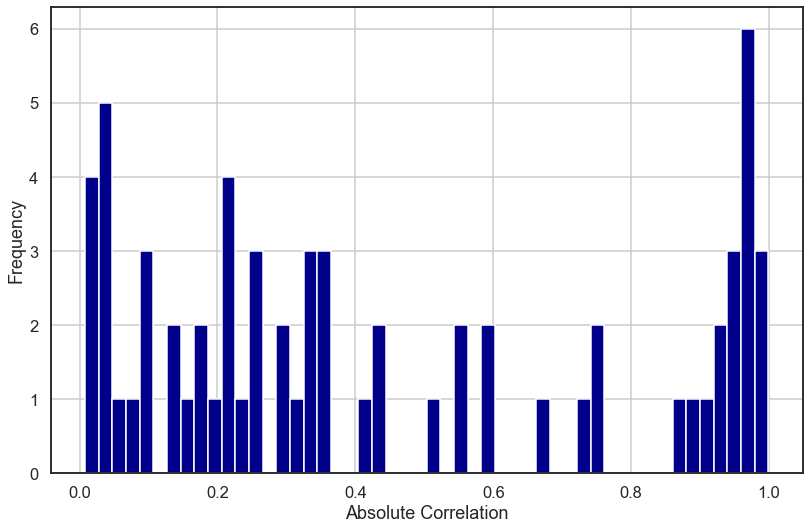

In [21]:
sns.set_context('talk')
sns.set_style('white')
ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8), color= 'darkblue')
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

### 5 - Scaling Data

In [22]:
# Scaling data is extremely important in clusterting.
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data[feature_cols] = scalar.fit_transform(data[feature_cols])
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
0,1.16,0.78,0.61,1.32,-1.13,1.08,0.71,1.11,0.88,-1.10,1.21,1.18,BERHI
1,0.37,0.07,-0.18,0.87,-1.90,0.43,0.87,0.32,0.81,-1.47,1.83,1.74,BERHI
2,2.14,1.44,1.33,1.94,-0.99,1.81,0.80,2.07,0.55,-1.02,1.32,1.10,BERHI
3,1.10,0.72,0.54,1.32,-1.25,1.04,0.72,1.05,0.74,-1.17,1.34,1.25,BERHI
4,0.46,0.25,0.10,0.76,-1.03,0.51,0.50,0.43,0.39,-1.04,1.19,1.11,BERHI


### 6 - Pair Plot

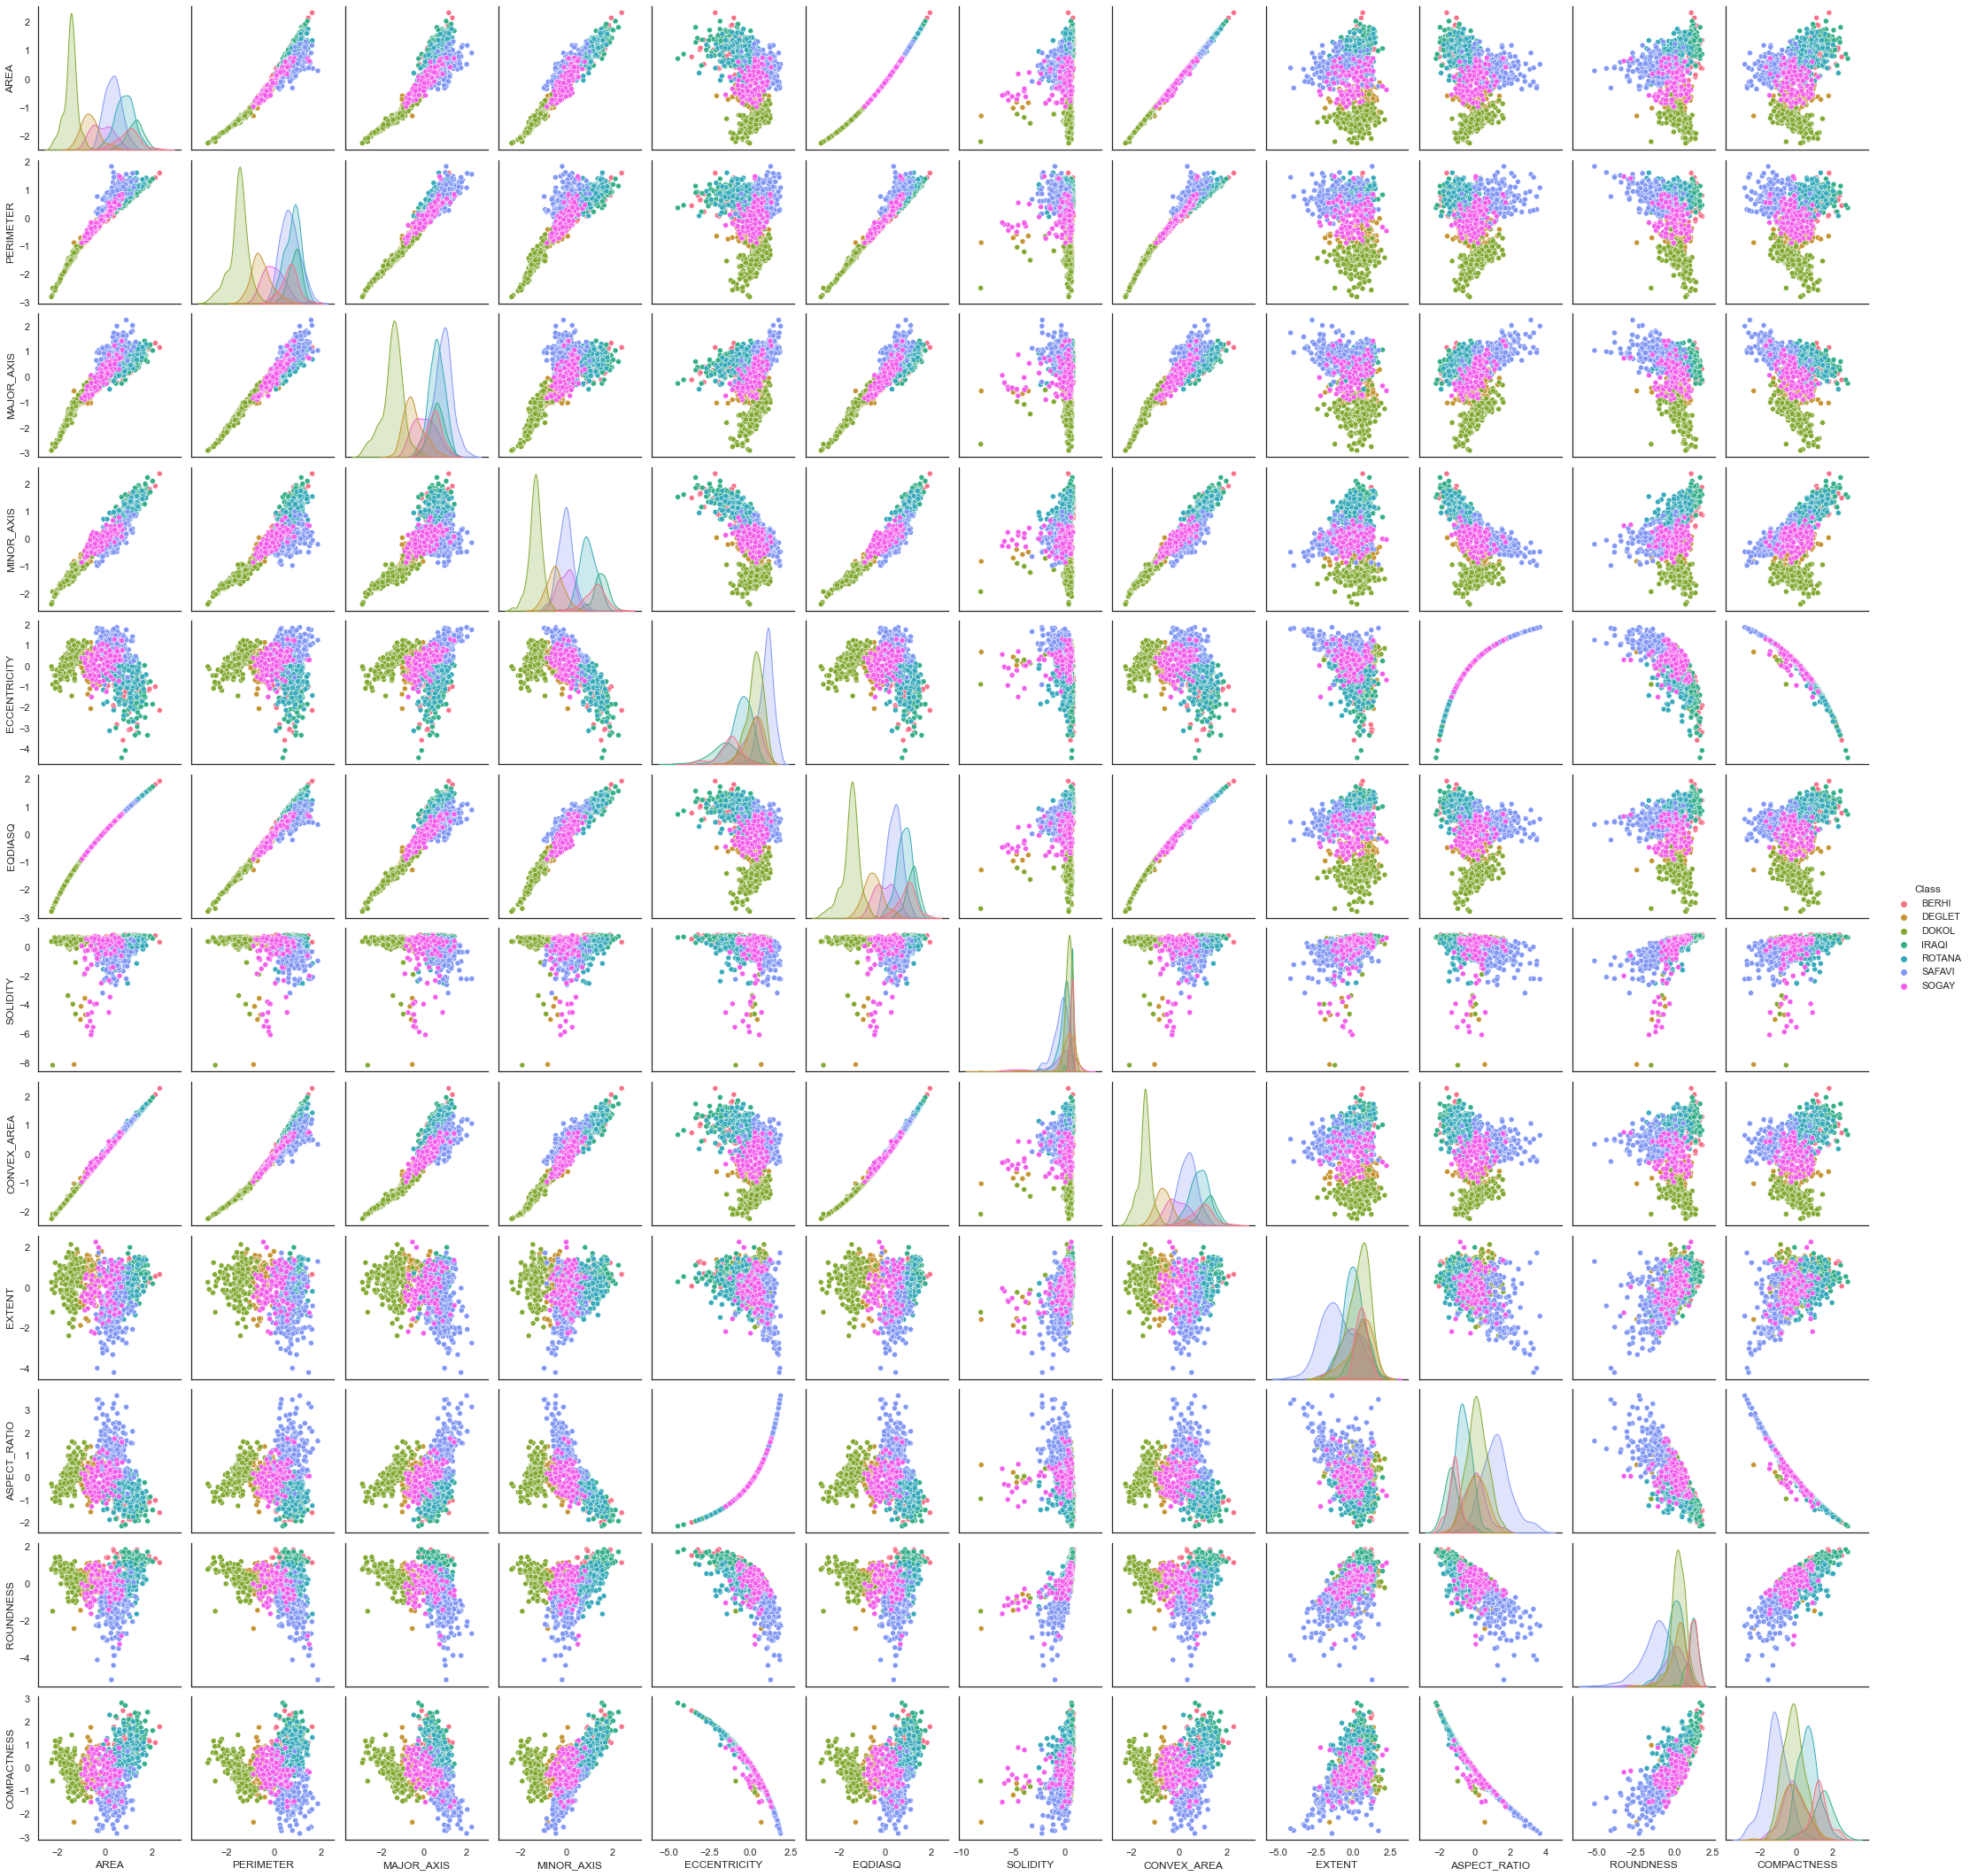

In [23]:
sns.set_context('notebook')
sns.pairplot(data, hue='Class');

#### The pair plot above shows the distinguished areas between classes

### 7 - Machine learning [ K-means Clustering]

In [24]:
from sklearn.cluster import KMeans
# Create and fit a range of models
km_list = list()

for clust in range(1,21): # Test 20 clusters 
    km = KMeans(n_clusters=clust, random_state=17) # Initiate the model
    km = km.fit(data[feature_cols])
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


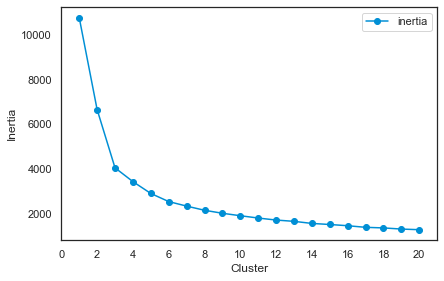

In [25]:
# Inertia elbow
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [26]:
# Try 7 clusters 
km = KMeans(n_clusters=7, random_state=17)
km = km.fit (data[feature_cols])
data['k-means'] = km.predict(data[feature_cols])

In [27]:
data.sample(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class,k-means
527,0.49,0.48,0.23,0.75,-0.74,0.54,-0.88,0.54,-0.63,-0.86,0.13,0.79,ROTANA,5
504,0.65,0.44,0.12,1.06,-1.59,0.67,0.33,0.63,-0.39,-1.34,1.03,1.49,ROTANA,3
598,0.66,0.83,0.49,0.77,-0.40,0.68,-0.24,0.68,-0.51,-0.61,-0.79,0.50,ROTANA,5
616,0.25,0.34,0.47,0.19,0.41,0.32,-0.41,0.27,-0.97,0.19,-0.19,-0.38,SAFAVI,6
166,-0.85,-0.81,-0.70,-0.75,0.41,-0.77,0.55,-0.87,-0.06,0.18,0.29,-0.27,DOKOL,0
562,0.37,0.41,0.45,0.41,0.11,0.43,-0.77,0.41,-0.11,-0.15,-0.04,-0.06,ROTANA,5
886,-0.37,-0.19,-0.19,-0.27,0.31,-0.26,-0.12,-0.37,-0.12,0.07,-0.41,-0.24,SOGAY,0
808,0.31,0.28,0.56,0.15,0.55,0.38,0.62,0.28,1.06,0.37,0.40,-0.43,SOGAY,0
779,-0.11,0.00,0.22,-0.24,0.71,-0.01,0.13,-0.12,-1.00,0.60,-0.14,-0.63,SAFAVI,6
148,-1.28,-0.87,-0.55,-0.81,0.69,-1.28,-8.10,-1.03,-1.57,0.57,-2.42,-2.34,DEGLET,2


In [28]:
# Group by Class and K-means for comparsion between clustered classes and actual classes 
(data[['Class','k-means']] # Class vs K means
 .groupby(['k-means','Class'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
k-means Class         
0       BERHI        2
        DEGLET      70
        DOKOL        7
        ROTANA       5
        SAFAVI       5
        SOGAY       53
1       DEGLET      18
        DOKOL      193
        SOGAY        1
2       DEGLET       5
        DOKOL        4
        SOGAY       13
3       BERHI       55
        IRAQI       62
        ROTANA      30
4       SAFAVI      93
        SOGAY        2
5       BERHI        8
        DEGLET       2
        IRAQI       10
        ROTANA     123
        SAFAVI       8
        SOGAY        6
6       DEGLET       3
        ROTANA       8
        SAFAVI      92
        SOGAY       19

### 8 - Machine Learning Agglomerative Clustering

In [29]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[feature_cols])
data['agglom'] = ag.fit_predict(data[feature_cols])

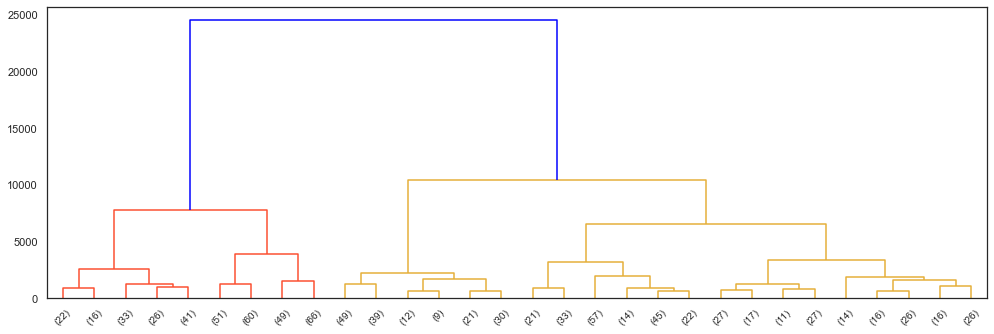

In [30]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')

In [31]:
(data[['agglom','Class']]
                        .groupby(['agglom','Class'])
                        .size()
                        .to_frame()
                        .rename(columns={0:'number'}))

number
agglom Class         
0      DEGLET      15
       DOKOL      189
1      BERHI       18
       DEGLET       1
       IRAQI       11
       ROTANA     125
       SAFAVI       9
       SOGAY        5
2      DEGLET       2
       ROTANA       9
       SAFAVI     150
       SOGAY       13
3      BERHI        2
       DEGLET      31
       DOKOL        5
       IRAQI        1
       ROTANA      17
       SAFAVI      38
       SOGAY       51
4      DEGLET       5
       DOKOL        4
       ROTANA       3
       SAFAVI       1
       SOGAY       10
5      BERHI       45
       IRAQI       60
       ROTANA      12
6      DEGLET      44
       DOKOL        6
       SOGAY       15

### 9 - Machine Learning [Mean Shift]

In [32]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=2.2, n_jobs=-1) 
ms.fit(data[feature_cols])
data['MeanShift'] = ms.fit_predict(data[feature_cols])

In [33]:
(data[['MeanShift','Class']]
                          .groupby(['MeanShift','Class'])
                          .size()
                          .to_frame()
                          .rename(columns={0:'number'}))

number
MeanShift Class         
0         BERHI       63
          DEGLET       1
          IRAQI       72
          ROTANA     148
          SAFAVI      13
          SOGAY        5
1         DEGLET      30
          DOKOL      197
          SOGAY        1
2         BERHI        2
          DEGLET      62
          DOKOL        3
          ROTANA      18
          SAFAVI     141
          SOGAY       73
3         DEGLET       4
          DOKOL        3
          SAFAVI       5
          SOGAY       13
4         SAFAVI      39
          SOGAY        2
5         DEGLET       1
6         DOKOL        1

### 10 - Machine Learning [DBSCAN]

In [34]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.7, min_samples=3, metric='euclidean')
data['DBSCAN'] = dbs.fit_predict(data[feature_cols])

In [35]:
(data[['Class','DBSCAN']]
                        .groupby(['DBSCAN','Class'])
                        .size()
                        .to_frame()
                        .rename(columns={0:'number'}))

number
DBSCAN Class         
-1     BERHI        8
       DEGLET      20
       DOKOL       22
       IRAQI       12
       ROTANA      40
       SAFAVI      92
       SOGAY       43
 0     BERHI       54
       DEGLET       9
       IRAQI       60
       ROTANA     124
       SAFAVI      81
       SOGAY       38
 1     BERHI        3
 2     DEGLET      63
       DOKOL      182
       SOGAY       12
 3     DEGLET       2
       SAFAVI       5
 4     DEGLET       4
 5     ROTANA       2
       SAFAVI       1
 6     SAFAVI       3
 7     SAFAVI       4
 8     SAFAVI       3
 9     SAFAVI       4
 10    SAFAVI       3
 11    SAFAVI       2
       SOGAY        1

### 11 - Clusterting Conclusion:
    from above findings both of K-means clustering and Agglomerative clustering did a good job. On the other hand, DBSCAN and mean Shift performed poorly

### 12 - Principle Component Analysis
    We will try to use classification method on the dataset, but we will reduce dimensions before applying classification

In [36]:
# Let's call the data before scaling
display(data_orig.head())
print('Number of columns is', data_orig.shape[1])

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
0,422163,2378.91,837.85,645.67,0.64,733.15,0.99,424428,0.78,1.30,0.94,0.88,BERHI
1,338136,2085.14,723.82,595.21,0.57,656.15,1.00,339014,0.78,1.22,0.98,0.91,BERHI
2,526843,2647.39,940.74,715.36,0.65,819.02,1.00,528876,0.77,1.31,0.94,0.87,BERHI
3,416063,2351.21,827.98,645.30,0.63,727.84,0.99,418255,0.78,1.28,0.95,0.88,BERHI
4,347562,2160.35,763.99,582.84,0.65,665.23,0.99,350797,0.76,1.31,0.94,0.87,BERHI


Number of columns is 13


In [37]:
X = data_orig.drop('Class', axis =1)
y = data_orig.Class

In [38]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify = y)

In [39]:
# Scaling data
scalar = StandardScaler()
# fit transform only X_train
X_train_s = scalar.fit_transform(X_train)
# Transform only X_test
X_test_s = scalar.transform(X_test)

In [40]:
# Reduce dimensions
from sklearn.decomposition import PCA  
model = PCA(n_components=2)            
X_train_s_PCA = model.fit_transform(X_train_s)  # Fit and transform X_train_S                     
X_test_s_PCA = model.transform(X_test_s)   # Transform only X_test_s      
X_test_s_PCA[1:11] # Showing first 10 roes

array([[-2.10966385,  0.13422177],
       [-3.18283878, -0.24803878],
       [ 4.79290448, -2.89116741],
       [-3.47331622, -0.20618675],
       [-2.9458806 , -2.55368219],
       [-3.64423357, -1.56002858],
       [ 3.75660382, -0.59059666],
       [ 1.11068072,  0.53039967],
       [ 0.11471771,  2.61989018],
       [ 1.27558408,  1.23538231]])

In [41]:
# Use KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn = knn.fit(X_train_s_PCA, y_train)
y_pred = knn.predict(X_test_s_PCA)

print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

       BERHI       0.47      0.45      0.46        20
      DEGLET       0.71      0.69      0.70        29
       DOKOL       0.98      0.97      0.98        61
       IRAQI       0.57      0.59      0.58        22
      ROTANA       0.71      0.80      0.75        50
      SAFAVI       0.85      0.92      0.88        60
       SOGAY       0.42      0.29      0.34        28

    accuracy                           0.76       270
   macro avg       0.67      0.67      0.67       270
weighted avg       0.74      0.76      0.75       270

Accuracy score:  0.76


#### We scored an accuracy of 0.76  by only using 2 PCAs 

In [42]:
Reduced_df = pd.DataFrame(y_test)
Reduced_df['PCA1'] = X_test_s_PCA[:,0]
Reduced_df['PCA2'] = X_test_s_PCA[:,1]
Reduced_df.reset_index().drop('index',axis = 1)

,Class,PCA1,PCA2
0,DOKOL,3.83,-0.78
1,IRAQI,-2.11,0.13
2,ROTANA,-3.18,-0.25
3,DOKOL,4.79,-2.89
4,ROTANA,-3.47,-0.21
...,...,...,...
265,DEGLET,0.90,-1.78
266,DOKOL,4.02,-2.00
267,DOKOL,3.63,-0.76
268,DOKOL,3.16,0.86


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


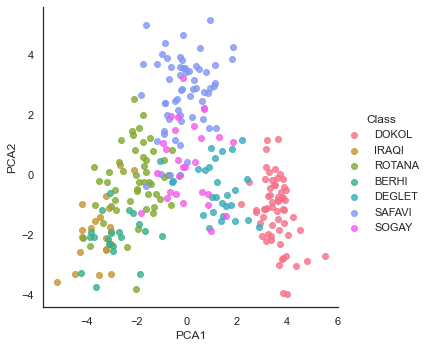

In [43]:
# plotting the two PCAs
sns.lmplot('PCA1', 'PCA2', hue='Class', data=Reduced_df, fit_reg=False);

### Data Reference
[1] KOKLU, M., KURSUN, R., TASPINAR, Y. S., and CINAR, I. (2021). Classification of Date Fruits into Genetic Varieties Using Image Analysis. Mathematical Problems in Engineering, Vol.2021, Article ID: 4793293, DOI:10.1155/2021/4793293 https://www.hindawi.com/journals/mpe/2021/4793293/